# Import relevant libraries

Name-Ashu Bansal

Objective-To find the optimum number of clusters

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

# Load Data

In [3]:
raw_data=pd.read_csv('Iris.csv')
raw_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Select The Variables

In [4]:
x=raw_data.iloc[:,1:4]
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


# Cluster

In [5]:
kmeans=KMeans(3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# Clustering Result

In [6]:
cluster=kmeans.fit_predict(x)
cluster_data=x.copy()
cluster_data['cluster']=cluster
cluster_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,cluster
0,5.1,3.5,1.4,1
1,4.9,3.0,1.4,1
2,4.7,3.2,1.3,1
3,4.6,3.1,1.5,1
4,5.0,3.6,1.4,1
...,...,...,...,...
145,6.7,3.0,5.2,0
146,6.3,2.5,5.0,2
147,6.5,3.0,5.2,0
148,6.2,3.4,5.4,0


# Scale the data

In [7]:
from sklearn import preprocessing

In [8]:
x_scaled=preprocessing.scale(x)
x_scaled

array([[-0.90068117,  1.03205722, -1.3412724 ],
       [-1.14301691, -0.1249576 , -1.3412724 ],
       [-1.38535265,  0.33784833, -1.39813811],
       [-1.50652052,  0.10644536, -1.2844067 ],
       [-1.02184904,  1.26346019, -1.3412724 ],
       [-0.53717756,  1.95766909, -1.17067529],
       [-1.50652052,  0.80065426, -1.3412724 ],
       [-1.02184904,  0.80065426, -1.2844067 ],
       [-1.74885626, -0.35636057, -1.3412724 ],
       [-1.14301691,  0.10644536, -1.2844067 ],
       [-0.53717756,  1.49486315, -1.2844067 ],
       [-1.26418478,  0.80065426, -1.227541  ],
       [-1.26418478, -0.1249576 , -1.3412724 ],
       [-1.87002413, -0.1249576 , -1.51186952],
       [-0.05250608,  2.18907205, -1.45500381],
       [-0.17367395,  3.11468391, -1.2844067 ],
       [-0.53717756,  1.95766909, -1.39813811],
       [-0.90068117,  1.03205722, -1.3412724 ],
       [-0.17367395,  1.72626612, -1.17067529],
       [-0.90068117,  1.72626612, -1.2844067 ],
       [-0.53717756,  0.80065426, -1.170

# Elbow Method 

In [9]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

In [10]:
wcss

[449.9999999999999,
 191.8830947775226,
 120.35544683345853,
 94.92833560202348,
 75.54002231466244,
 62.83457583229361,
 54.92099139412723,
 47.02973872813309,
 40.38581985366474]

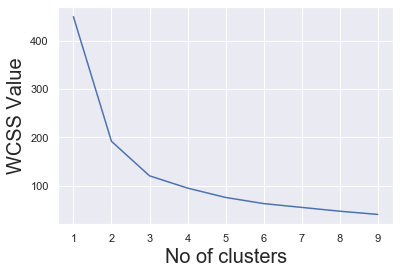

In [11]:
plt.plot(range(1,10),wcss)
plt.xlabel('No of clusters',fontsize=20)
plt.ylabel('WCSS Value',fontsize=20)
plt.show()

# Recreate clustring

In [12]:
kmeans_new=KMeans(3)
kmeans_new.fit(x_scaled)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
clean_data=x.copy()
new_cluster=kmeans_new.fit_predict(x_scaled)
clean_data['cluster']=new_cluster
clean_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,cluster
0,5.1,3.5,1.4,0
1,4.9,3.0,1.4,0
2,4.7,3.2,1.3,0
3,4.6,3.1,1.5,0
4,5.0,3.6,1.4,0
...,...,...,...,...
145,6.7,3.0,5.2,1
146,6.3,2.5,5.0,2
147,6.5,3.0,5.2,1
148,6.2,3.4,5.4,1


# Plot Clustering

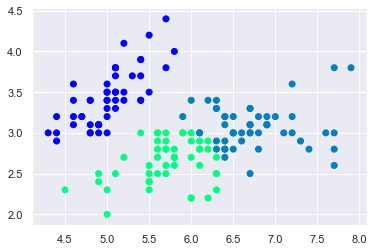

In [14]:
plt.scatter(clean_data['SepalLengthCm'],clean_data['SepalWidthCm'], c=clean_data['cluster'],cmap='winter')
plt.show()

## Optimum no. of clusters is 3